# Model Testbed

In [1]:
using AutomotiveDrivingModels
include(Pkg.dir("AutomotiveDrivingModels", "src", "viz", "AutoViz.jl"))
using AutoViz

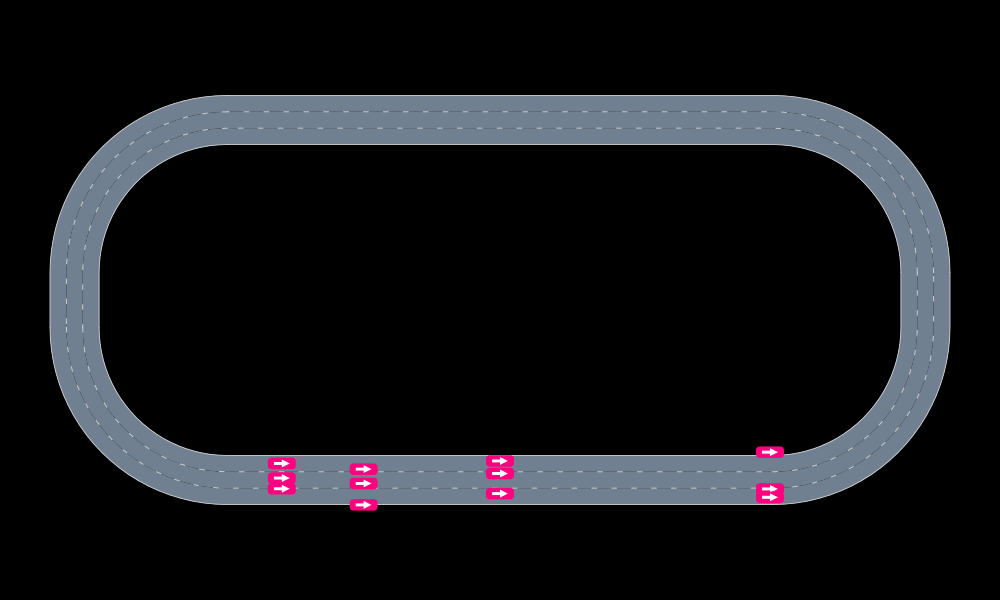

In [2]:
using Reactive, Interact

roadway = gen_stadium_roadway(3)
scene = Scene()
x = 10
j = 0
id_count = 0
for x in (10,25,50,99.5)
    for j in 0:2
        push!(scene,Vehicle(VehicleState(VecSE2(x,-j*DEFAULT_LANE_WIDTH+randn(),0.0), roadway, 20.0 + j), 
                            VehicleDef(id_count+=1, AgentClass.CAR, 4.826, 1.81)))
    end
end

render(scene, roadway)

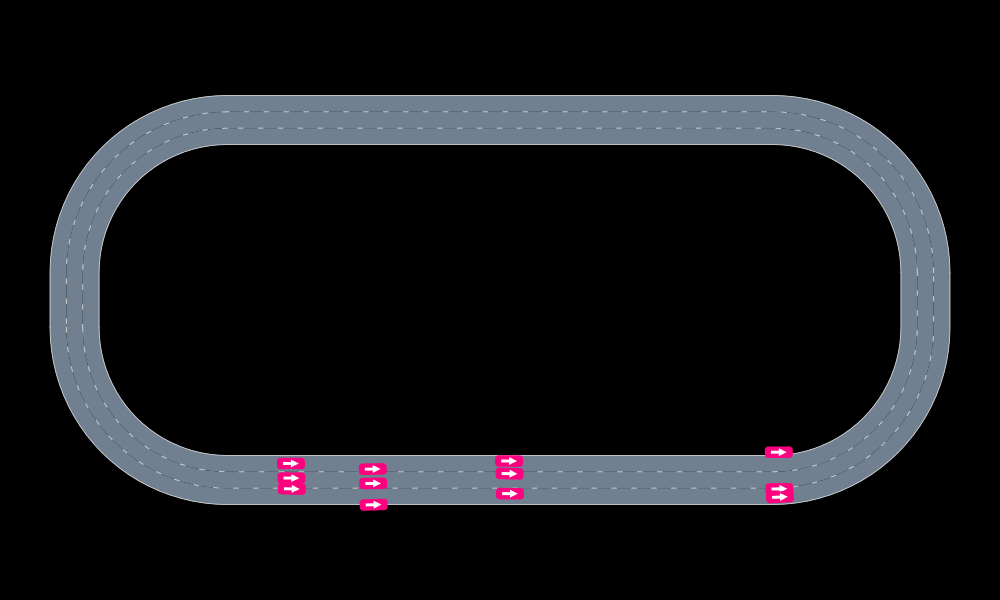

In [3]:
framerate = 24
context = IntegratedContinuous(1/framerate,3)
models = Dict{Int, DriverModel}()
for (i,veh) in enumerate(scene)
    models[veh.def.id] = LatLonSeparableDriver(context, ProportionalLaneTracker(σ=0.01, kp=5.0, kd=0.5), ProportionalSpeedTracker(σ=0.2, v_des=21.0))
end
actions = get_actions!(Array(LatLonAccel, length(scene)), scene, roadway, models)

function drawsim(t)
    get_actions!(actions, scene, roadway, models)
    tick!(scene, roadway, actions, models)
    render(scene, roadway)
end

ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim, timestamps)